We will be using Spark(2.x), sparksession; a simplified entry point. It encapsulates the spart context(sc in spark 1.x). There is no more confusion about which context( hive context, sql context) to use. Sparksession subsumes SQLContext and HiveContext/


In [2]:
from pyspark.sql import SparkSession # entry point to the spark application

In [5]:
spark = SparkSession.builder.appName("Analyzing London crime data").getOrCreate()
# creates the spark session, with application name

In [7]:
data = spark.read.format("csv").option("header", "true").load("london_crime_by_lsoa.csv")
# reads the dataset

In [9]:
data.printSchema() # to see the schema of the data

root
 |-- lsoa_code: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- major_category: string (nullable = true)
 |-- minor_category: string (nullable = true)
 |-- value: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)



In [10]:
data.count()

13490604

In [13]:
# Let's get the subset of data
data.limit(5).show()

+---------+----------+--------------------+--------------------+-----+----+-----+
|lsoa_code|   borough|      major_category|      minor_category|value|year|month|
+---------+----------+--------------------+--------------------+-----+----+-----+
|E01001116|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+---------+----------+--------------------+--------------------+-----+----+-----+



In [14]:
data.dropna()

DataFrame[lsoa_code: string, borough: string, major_category: string, minor_category: string, value: string, year: string, month: string]

In [18]:
data = data.drop("lsoa_code")
data.show(5)

+----------+--------------------+--------------------+-----+----+-----+
|   borough|      major_category|      minor_category|value|year|month|
+----------+--------------------+--------------------+-----+----+-----+
|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+----------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [19]:
total_boroughs = data.select('borough').distinct()

total_boroughs.show()

+--------------------+
|             borough|
+--------------------+
|             Croydon|
|          Wandsworth|
|              Bexley|
|             Lambeth|
|Barking and Dagenham|
|              Camden|
|           Greenwich|
|              Newham|
|       Tower Hamlets|
|            Hounslow|
|              Barnet|
|              Harrow|
|Kensington and Ch...|
|           Islington|
|               Brent|
|            Haringey|
|             Bromley|
|              Merton|
|         Westminster|
|             Hackney|
+--------------------+
only showing top 20 rows



In [20]:
total_boroughs.count()

33

In [21]:
# filter data

hackney_data = data.filter(data['borough']=="Hackney")

hackney_data.show(5)

+-------+--------------------+--------------------+-----+----+-----+
|borough|      major_category|      minor_category|value|year|month|
+-------+--------------------+--------------------+-----+----+-----+
|Hackney|     Criminal Damage|Criminal Damage T...|    0|2011|    6|
|Hackney|Violence Against ...|          Harassment|    1|2013|    2|
|Hackney|     Criminal Damage|Other Criminal Da...|    0|2011|    7|
|Hackney|Violence Against ...|        Wounding/GBH|    0|2013|   12|
|Hackney|  Theft and Handling|  Other Theft Person|    0|2016|    8|
+-------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [24]:
# only want those records that happend in the year 2015/2016

data_2015_2016 = data.filter(data['year'].isin(["2015", "2016"]))
# sample to see only a fraction of the entire data

data_2015_2016.sample(fraction=0.1).show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|             Lambeth|Violence Against ...|      Other violence|    0|2015|    4|
|              Newham|     Criminal Damage|Criminal Damage T...|    0|2015|    1|
|            Havering|            Burglary|Burglary in a Dwe...|    1|2016|    8|
|              Newham|Violence Against ...|      Other violence|    0|2015|    3|
|              Barnet|  Theft and Handling|Handling Stolen G...|    0|2016|    4|
|             Hackney|Violence Against ...| Assault with Injury|    2|2015|    5|
|             Enfield|  Theft and Handling|Theft From Motor ...|    2|2015|   10|
|             Lambeth|               Drugs|    Drug Trafficking|    0|2015|    5|
|             Cr

### Aggregations on Dataframes

In [28]:
borough_crime_count = data.groupBy('borough').count()

In [30]:
borough_crime_count.show()

+--------------------+------+
|             borough| count|
+--------------------+------+
|             Croydon|602100|
|          Wandsworth|498636|
|              Bexley|385668|
|             Lambeth|519048|
|Barking and Dagenham|311040|
|              Camden|378432|
|           Greenwich|421200|
|              Newham|471420|
|       Tower Hamlets|412128|
|            Hounslow|395928|
|              Barnet|572832|
|              Harrow|365688|
|Kensington and Ch...|296784|
|           Islington|359208|
|               Brent|490644|
|            Haringey|413856|
|             Bromley|523908|
|              Merton|339876|
|         Westminster|366660|
|             Hackney|417744|
+--------------------+------+
only showing top 20 rows



In [31]:
borough_conviction_sum = data.groupBy('borough').agg({"value":"sum"})
# sum is an aggregation function that is available in pyspark. It calculates the sum of groupedby data in "value" column

In [32]:
borough_conviction_sum.show(5)

+--------------------+----------+
|             borough|sum(value)|
+--------------------+----------+
|             Croydon|  260294.0|
|          Wandsworth|  204741.0|
|              Bexley|  114136.0|
|             Lambeth|  292178.0|
|Barking and Dagenham|  149447.0|
+--------------------+----------+
only showing top 5 rows



value column contains the number of convictions per crime report. We have just found out the total number of convictions(per borough)


But, let's rename the column sum(value)

In [34]:
borough_conviction_sum = data.groupBy('borough').agg({"value":"sum"}).withColumnRenamed("sum(value)", "convictions")

In [35]:
borough_conviction_sum.show(5)

+--------------------+-----------+
|             borough|convictions|
+--------------------+-----------+
|             Croydon|   260294.0|
|          Wandsworth|   204741.0|
|              Bexley|   114136.0|
|             Lambeth|   292178.0|
|Barking and Dagenham|   149447.0|
+--------------------+-----------+
only showing top 5 rows



In [36]:
total_borough_convictions = borough_conviction_sum.agg({"convictions":"sum"})

In [37]:
total_borough_convictions.show()

+----------------+
|sum(convictions)|
+----------------+
|       6447758.0|
+----------------+



In [38]:
total_convictions = total_borough_convictions.collect()[0][0]

we will use this information "total_convictions" to understand the percentage contribution of convictions on a per borough basis

In [39]:
import pyspark.sql.functions as func

In [40]:
# .withColumn(colname, col) is used to introduce a new column in borough_conviction_sum
 
borough_percentage_contribution = borough_conviction_sum.withColumn("% contribution", 
                                                                   func.round(borough_conviction_sum.convictions / total_convictions * 100, 2))


borough_percentage_contribution.printSchema()

root
 |-- borough: string (nullable = true)
 |-- convictions: double (nullable = true)
 |-- % contribution: double (nullable = true)



In [41]:
borough_percentage_contribution.orderBy(borough_percentage_contribution[2].desc()).show(10)

+-------------+-----------+--------------+
|      borough|convictions|% contribution|
+-------------+-----------+--------------+
|  Westminster|   455028.0|          7.06|
|      Lambeth|   292178.0|          4.53|
|    Southwark|   278809.0|          4.32|
|       Camden|   275147.0|          4.27|
|       Newham|   262024.0|          4.06|
|      Croydon|   260294.0|          4.04|
|       Ealing|   251562.0|           3.9|
|    Islington|   230286.0|          3.57|
|Tower Hamlets|   228613.0|          3.55|
|        Brent|   227551.0|          3.53|
+-------------+-----------+--------------+
only showing top 10 rows



total convictions monthly for the year 2014

In [44]:
convictions_monthly = data.filter(data['year'] == 2014) \
                            .groupBy('month')\
                            .agg({"value":"sum"}) \
                            .withColumnRenamed("sum(value)", "convictions")

In [48]:
convictions_monthly.show()

+-----+-----------+
|month|convictions|
+-----+-----------+
|    7|    58564.0|
|   11|    59704.0|
|    3|    57669.0|
|    8|    55641.0|
|    5|    56327.0|
|    6|    57039.0|
|    9|    56933.0|
|    1|    55515.0|
|   10|    60537.0|
|    4|    53467.0|
|   12|    57565.0|
|    2|    51222.0|
+-----+-----------+



In [50]:
total_convictions_monthly = convictions_monthly.agg({"convictions":"sum"}).collect()[0][0]

total_convictions_percent_monthly = convictions_monthly.withColumn("percentage", 
                                func.round(convictions_monthly.convictions/total_convictions_monthly * 100, 2))

In [51]:
total_convictions_percent_monthly.columns

['month', 'convictions', 'percentage']

In [52]:
total_convictions_percent_monthly.show(5)

+-----+-----------+----------+
|month|convictions|percentage|
+-----+-----------+----------+
|    7|    58564.0|      8.61|
|   11|    59704.0|      8.78|
|    3|    57669.0|      8.48|
|    8|    55641.0|      8.18|
|    5|    56327.0|      8.28|
+-----+-----------+----------+
only showing top 5 rows



In [54]:
total_convictions_percent_monthly.orderBy(total_convictions_percent_monthly.percentage.desc()).show()

+-----+-----------+----------+
|month|convictions|percentage|
+-----+-----------+----------+
|   10|    60537.0|       8.9|
|   11|    59704.0|      8.78|
|    7|    58564.0|      8.61|
|    3|    57669.0|      8.48|
|   12|    57565.0|      8.46|
|    6|    57039.0|      8.39|
|    9|    56933.0|      8.37|
|    5|    56327.0|      8.28|
|    8|    55641.0|      8.18|
|    1|    55515.0|      8.16|
|    4|    53467.0|      7.86|
|    2|    51222.0|      7.53|
+-----+-----------+----------+



In [55]:
crimes_category = data.groupBy('major_category').agg({"value":"sum"}).withColumnRenamed("sum(value)", "convictions")

In [56]:
crimes_category.orderBy(crimes_category.convictions.desc()).show()

+--------------------+-----------+
|      major_category|convictions|
+--------------------+-----------+
|  Theft and Handling|  2661861.0|
|Violence Against ...|  1558081.0|
|            Burglary|   754293.0|
|     Criminal Damage|   630938.0|
|               Drugs|   470765.0|
|             Robbery|   258873.0|
|Other Notifiable ...|   106349.0|
|    Fraud or Forgery|     5325.0|
|     Sexual Offences|     1273.0|
+--------------------+-----------+



In [58]:
year_df = data.select('year')

year_df.agg({"year":"max"}).show()

+---------+
|max(year)|
+---------+
|     2016|
+---------+



In [59]:
year_df.agg({"year":"min"}).show()

+---------+
|min(year)|
+---------+
|     2008|
+---------+



In [60]:
year_df.describe().show()

+-------+------------------+
|summary|              year|
+-------+------------------+
|  count|          13490604|
|   mean|            2012.0|
| stddev|2.5819889931674522|
|    min|              2008|
|    max|              2016|
+-------+------------------+



Crosstab (matrix) representation

borough_major_category is a column in the crosstab, that was generated. borough is the y-axis here.

In [63]:
data.crosstab('borough', 'major_category').select('borough_major_category', 'Burglary', 'Drugs', 'Fraud or Forgery', 'Robbery') \
.show()

+----------------------+--------+-----+----------------+-------+
|borough_major_category|Burglary|Drugs|Fraud or Forgery|Robbery|
+----------------------+--------+-----+----------------+-------+
|              Havering|   32400|32616|            5508|  27648|
|                Merton|   26784|29160|            5724|  23652|
|              Haringey|   31320|35424|           10368|  29484|
|         Tower Hamlets|   31104|37368|            5400|  28512|
|               Bromley|   42552|42336|            8532|  34668|
|               Enfield|   39528|44064|            9720|  35532|
|  Kingston upon Thames|   21168|22140|            3780|  15660|
|           Westminster|   27648|32616|            8748|  25056|
|  Richmond upon Thames|   24840|23004|            2808|  18468|
|              Lewisham|   36504|43740|           11016|  34884|
|                 Brent|   37368|46980|            9288|  34128|
|  Barking and Dagenham|   23760|26244|            7236|  22248|
|             Redbridge| 

## Matplotlib

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
def describe_year(year):
    yearly_data = data.filter(data.year == year)\
    .groupBy('borough').agg({'value':'sum'}).withColumnRenamed("sum(value)", "convictions")
    
    borough_list = [x[0] for x in yearly_data.toLocalIterator()]
    convictions_list = [x[1] for x in yearly_data.toLocalIterator()]
    
    plt.figure(figsize = (33, 10))
    plt.bar(borough_list, convictions_list)
    plt.title("Crime for the year - "+year, fontsize=30, color='r')
    plt.xlabel("Boroughs", fontsize=30)
    plt.ylabel("Convictions", fontsize=30)
    
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.autoscale()
    plt.show()
    

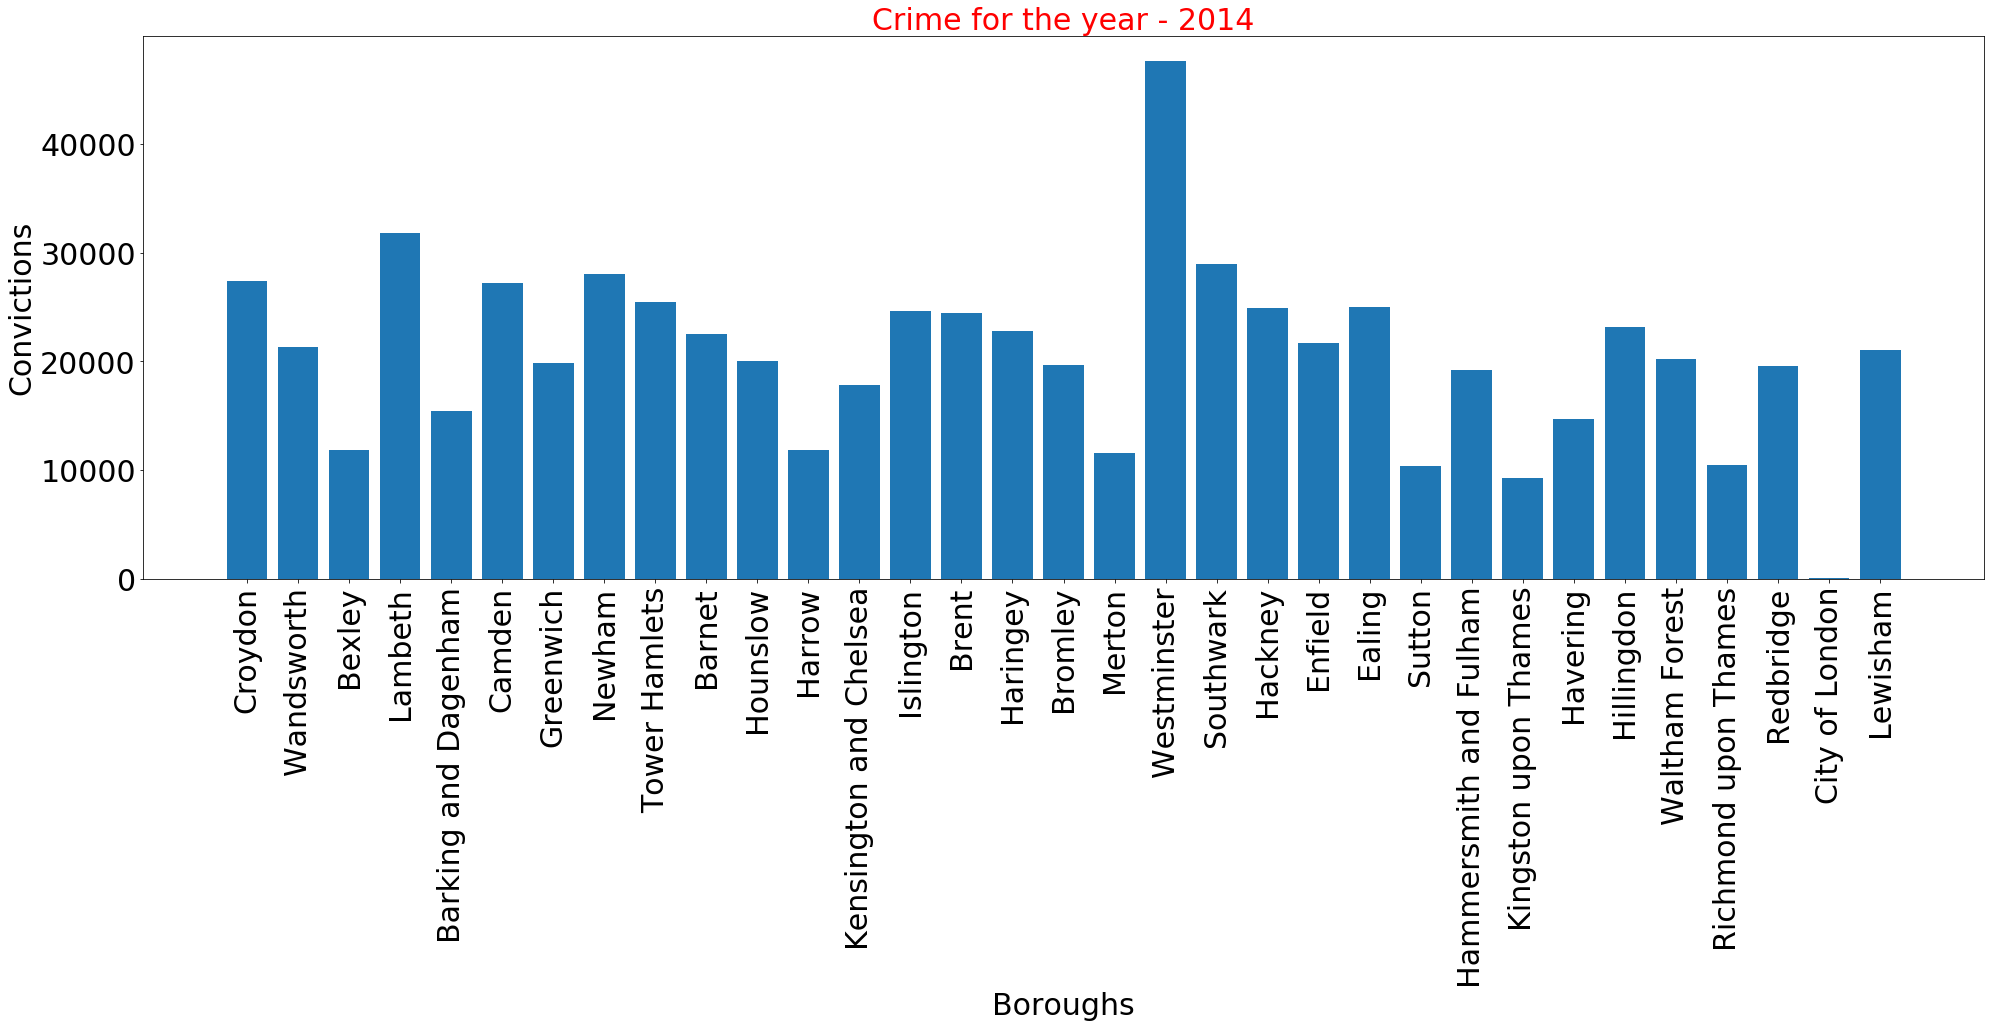

In [71]:
describe_year('2014')

## Accumulators and Broadcast Variables
to share variables

Broadcast variables - only 1 read-only copy per worker node. Tasks on the worker node will make use of it. Will be cached in-memory on each worker node. Use whenever there are tasks across stages, but all the tasks needs same data. Share dataset with all nodes, (training data in ML)


Accumulators - Broadcasts variables to the worker nodes, but can be modified by adding to it, read-write variables. Can be modified at the worker nodes. And these modifications are restricted; they can only be added - associatively and commutatively. Spark native support for accumulators of type - Long, Double, Collections. But, you can extend by by subclassing AccumulatorV2 library.
